<a href="https://colab.research.google.com/github/eminshall/Demand_Forecasting/blob/main/Two_Similiar_Products_Price_Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pymc==4.1.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.1/543.1 KB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 38.8 MB/s eta 0:00:00
  Attempting uninstall: pymc
    Found existing installation: pymc 5.1.2
    Uninstalling pymc-5.1.2:
      Successfully uninstalled pymc-5.1.2


In [ ]:
!pip install --upgrade ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 796.4/796.4 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.0 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython~=7.34.0, but you have ipython 8.12.0 which is incompatible.


In [2]:
import pymc as pm

In [3]:
import numpy as np
from scipy import stats
from matplotlib import pylab as plt
import seaborn as sns
sns.set_style("whitegrid")

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Two Related Products

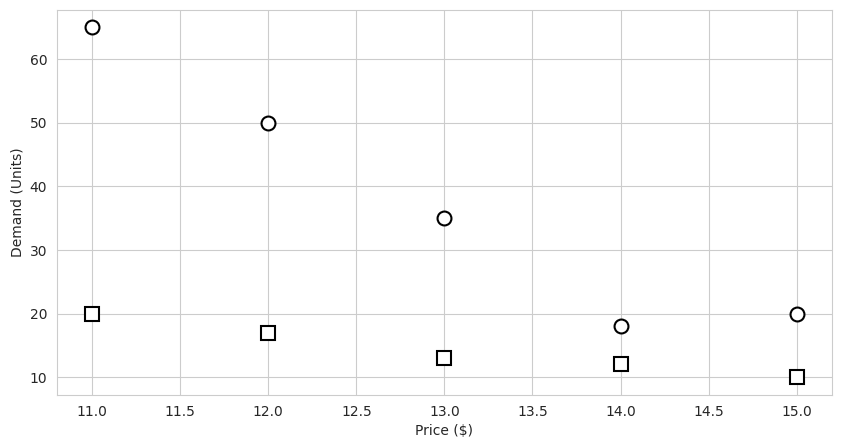

In [4]:
price_demand = [
    { 15: 20, 14: 18, 13: 35, 12: 50, 11: 65}, # product 1
    { 15: 10, 14: 12, 13: 13, 12: 17, 11: 20}  # product 2
]

p01, d01 = list(price_demand[0].keys()), list(price_demand[0].values())
p02, d02 = list(price_demand[1].keys()), list(price_demand[1].values())

#Plot price_demand for each product 'o' is product 1 'square' is product 2
fig = plt.figure(figsize=(10, 5))
plt.plot(p01, d01, 'ko', markeredgewidth=1.5, markerfacecolor='w', markersize=10)
plt.plot(p02, d02, 'ks', markeredgewidth=1.5, markerfacecolor='w', markersize=10)
plt.xlabel('Price ($)')
plt.ylabel('Demand (Units)')
plt.show()

In [5]:
p, d = np.vstack([p01, p02]), np.vstack([d01, d02]) 

with pm.Model() as m:
    # priors
    log_b_mu, log_b_cov = np.zeros(2), 10*np.eye(2)
    log_b = pm.MvNormal('log_b', mu=log_b_mu, cov=log_b_cov, shape=(2,))  

    c_mu = np.zeros(2)
    c_cov = 10 * np.array([[  1.0,  0.9], 
                           [  0.9,  1.0]])
    c = pm.MvNormal('c', mu=c_mu, cov=c_cov, shape=(2,))

    log_d1 = log_b - c * np.log(p.T)                    # demand model
    pm.Poisson('d0', np.exp(log_d1), observed = d.T)    # likelihood
    s = pm.sample(1000, return_inferencedata=False)     # inference

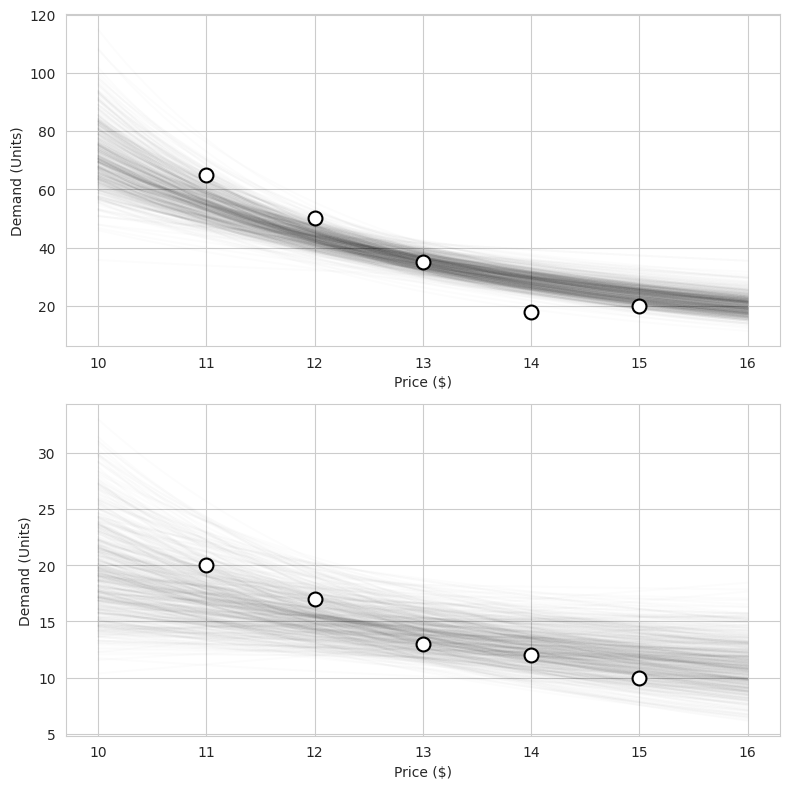

In [6]:
p = np.linspace(10, 16)   # price range
d_means = [
    np.exp(s.log_b[:, i] - s.c[:, i] * np.log(p).reshape(-1, 1))[:, :500] for i in [0, 1]
]

fig, ax = plt.subplots(2, 1, figsize=(8, 8))
ax[0].plot(p, d_means[0], c = 'k', alpha = 0.01)
ax[0].plot(p01, d01, 'ko', markeredgewidth=1.5, markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Price ($)')
ax[0].set_ylabel('Demand (Units)')

ax[1].plot(p, d_means[1], c = 'k', alpha = 0.01)
ax[1].plot(p02, d02, 'ko', markeredgewidth=1.5, markerfacecolor='w', markersize=10)
ax[1].set_xlabel('Price ($)')
ax[1].set_ylabel('Demand (Units)')

plt.tight_layout()
plt.show()